In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [2]:
ticker = "^BVSP"
data = yf.Ticker(ticker).history(period="2y")

data['Tomorrow_Close'] = data['Close'].shift(-1)
data['Day_Before_Close'] = data['Close'].shift(1)
data['Five_Days_Before_Close'] = data['Close'].shift(5)
data['Seven_Days_Before_Close'] = data['Close'].shift(7)

data.dropna(inplace=True)

data['Goal'] = (data['Tomorrow_Close'] > data['Close']).astype(int)

del data['Dividends']
del data['Stock Splits']

data.head()

,Open,High,Low,Close,Volume,Tomorrow_Close,Day_Before_Close,Five_Days_Before_Close,Seven_Days_Before_Close,Goal
Date,,,,,,,,,,
2022-07-12 00:00:00-03:00,98212.0,98737.0,97253.0,98271.0,12566300,97881.0,98212.0,98295.0,98954.0,0
2022-07-13 00:00:00-03:00,98258.0,98928.0,97403.0,97881.0,12208100,96121.0,98271.0,98719.0,98609.0,0
2022-07-14 00:00:00-03:00,97879.0,97879.0,95431.0,96121.0,12579000,96551.0,97881.0,100730.0,98295.0,1
2022-07-15 00:00:00-03:00,96119.0,96971.0,95267.0,96551.0,11347600,96916.0,96121.0,100289.0,98719.0,1
2022-07-18 00:00:00-03:00,96553.0,98291.0,96553.0,96916.0,10738200,98245.0,96551.0,98212.0,100730.0,1


In [3]:
# Definindo datasets "separados" por um ano entre si para teste e treinamento

train = data.iloc[0:250, ]
test = data.iloc[250:500, ]

Text(0.5, 1.0, 'Preço de Fechamento do Ibovespa nos Últimos 2 Anos')

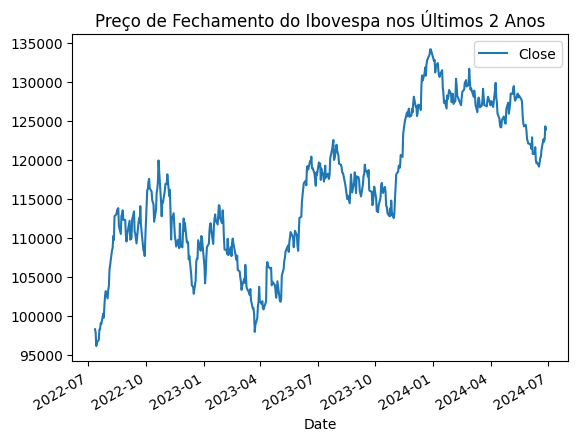

In [4]:
data.plot.line(y="Close", use_index=True)
plt.title("Preço de Fechamento do Ibovespa nos Últimos 2 Anos")

In [5]:
# Definindo testes e treinamentos

features = ['Close', 'Volume', 'Goal', 'Day_Before_Close', 'Five_Days_Before_Close']

X_train = train[features]
X_test = test[features]
y_train = train[['Tomorrow_Close']]
y_test = test[['Tomorrow_Close']]

In [6]:
# Mostrar Treinamento e Teste

print(f"TREINO\n{X_train}\nTESTE\n{X_test}")

TREINO
                              Close    Volume  Goal  Day_Before_Close  \
Date                                                                    
2022-07-12 00:00:00-03:00   98271.0  12566300     0           98212.0   
2022-07-13 00:00:00-03:00   97881.0  12208100     0           98271.0   
2022-07-14 00:00:00-03:00   96121.0  12579000     1           97881.0   
2022-07-15 00:00:00-03:00   96551.0  11347600     1           96121.0   
2022-07-18 00:00:00-03:00   96916.0  10738200     1           96551.0   
...                             ...       ...   ...               ...   
2023-07-05 00:00:00-03:00  119549.0  10959000     0          119076.0   
2023-07-06 00:00:00-03:00  117426.0  11025700     1          119549.0   
2023-07-07 00:00:00-03:00  118898.0  10521000     0          117426.0   
2023-07-10 00:00:00-03:00  117942.0   8104000     0          118898.0   
2023-07-11 00:00:00-03:00  117220.0  10592500     1          117942.0   

                           Five_Days_Before

In [7]:
# Normalizando os dados

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Treinando o modelo

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [9]:
# Fazendo as previsões

y_pred = model.predict(X_test_scaled)
y_pred

array([[118766.0008693 ],
       [117903.90000788],
       [118856.50041785],
       [116956.6024294 ],
       [116603.50008675],
       [118623.78440387],
       [119152.50914342],
       [121092.36359657],
       [122216.31239896],
       [122858.50235768],
       [121094.66816374],
       [121046.79262933],
       [121203.46882282],
       [120585.76852434],
       [120027.19263771],
       [119663.39366161],
       [119322.28928431],
       [118331.08653946],
       [118217.07389676],
       [117926.97777343],
       [117279.64305251],
       [117196.82117168],
       [116895.68379334],
       [115723.96925339],
       [115091.50648636],
       [114524.77772828],
       [116208.49908017],
       [114284.32010497],
       [115636.1947006 ],
       [117173.46078505],
       [116759.01176946],
       [115779.56060341],
       [116942.32870038],
       [118054.24358026],
       [117053.18668072],
       [116358.03623919],
       [116933.13451857],
       [116530.61554034],
       [1165

In [10]:
# Criterios de avaliacao do modelo

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"erro medio absoluto (MAE): {mae}")
print(f"erro quadratico medio (MSE): {mse}")
print(f"coeficiente de determinacao (R2): {r2}")
print(f"erro percentual absoluto medio (MAPE): {mape}%")

erro medio absoluto (MAE): 598.7806396348492
erro quadratico medio (MSE): 518680.80779788183
coeficiente de determinacao (R2): 0.9834732422364765
erro percentual absoluto medio (MAPE): 0.4860951598751239%


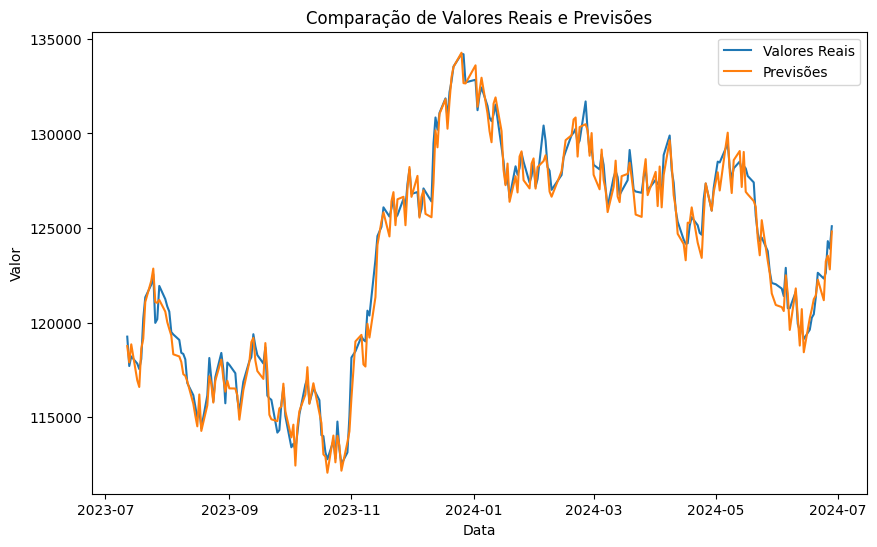

In [11]:
# Vizualicao das previsoes

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Valores Reais')  # índice 'y_test' 
plt.plot(y_test.index, y_pred, label='Previsões')             # Garantir que 'y_pred' esteja alinhado com 'y_test'
plt.legend()
plt.xlabel('Data') 
plt.ylabel('Valor')
plt.title('Comparação de Valores Reais e Previsões')  # Adicionando título ao gráfico
plt.show()

Previsões para os próximos 3 dias:
[[123545.03837036]
 [122816.31948096]
 [124815.72204135]]


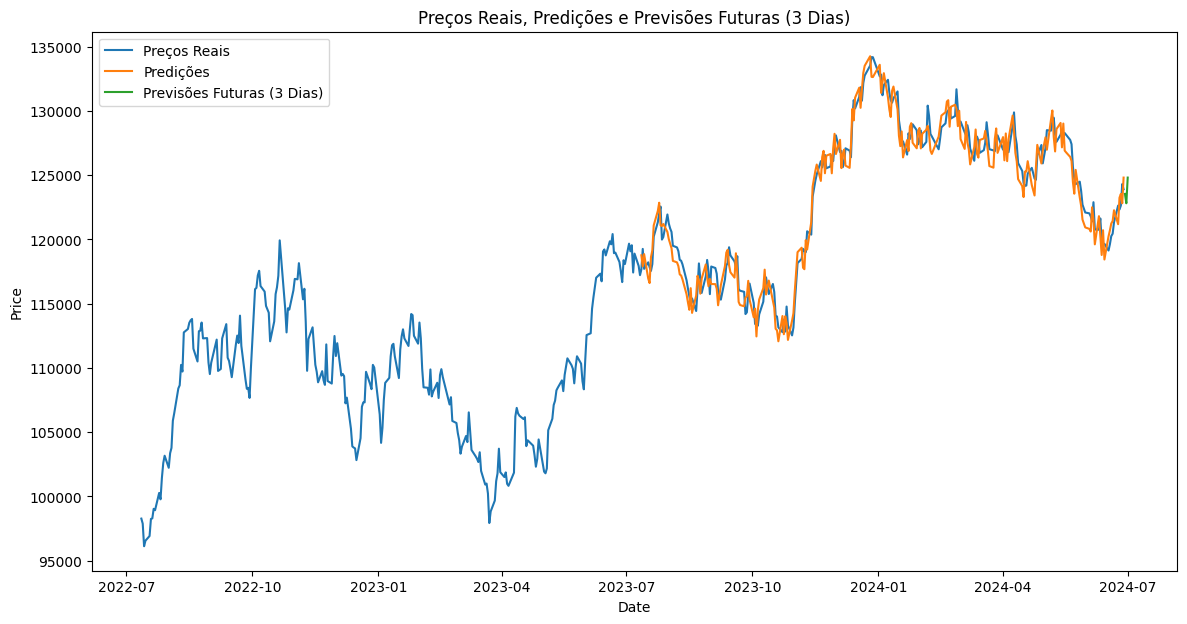

In [12]:
# Últimos pontos de dados para prever o futuro
last_data_points = data.iloc[-3:]

# Preparando os últimos dados como base para previsão futura
X_future = last_data_points[features]
X_future_scaled = scaler.transform(X_future)

# Previsão para os próximos 7 dias
future_predictions = model.predict(X_future_scaled)
print(f"Previsões para os próximos 3 dias:\n{future_predictions}")

# Data de início para previsões futuras
start_date = last_data_points.index.max() + pd.Timedelta(days=1)
end_date = start_date + pd.Timedelta(days=2)
future_dates = pd.date_range(start=start_date, end=end_date)

# Criando um DataFrame para as previsões futuras
future_df = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted_Price'])

# Plotando os resultados
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Preços Reais')
plt.plot(y_test.index, y_pred, label='Predições')
plt.plot(future_df.index, future_df['Predicted_Price'], label='Previsões Futuras (3 Dias)')
plt.title('Preços Reais, Predições e Previsões Futuras (3 Dias)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()